# Import necessary libraries

In [1]:

import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
import warnings
warnings.filterwarnings("ignore")

### Load MNIST dataset

In [2]:

mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(np.uint8)

In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
mnist.data[:10]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

### Data cleaning - SimpleImputer




In [7]:
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)

### Split dataset into training and testing sets

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X.astype(np.float32), y.astype(np.float32), random_state=42, test_size=0.10)


In [9]:
X_train.shape

(63000, 784)

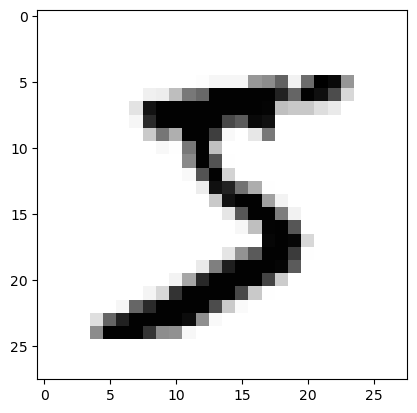

In [10]:
fig_model= plt.imshow(X[0].reshape(28, 28), cmap='Greys')
fig_model.figure
plt.show(fig_model)

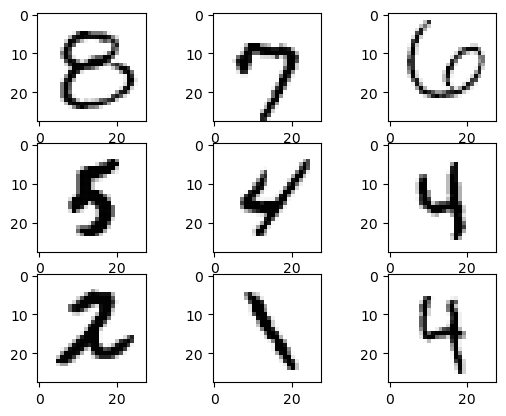

In [11]:
for i in range(9):
# define subplot
 plt.subplot(330 + 1 + i)
# plot raw pixel data
 plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')

### Standardize features

In [12]:

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Perform PCA for dimensionality reduction

In [13]:

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## 1. Logistic Regression

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [15]:
lr = LogisticRegression(tol=0.1)

In [16]:
# Define hyperparameters for grid search
param_grid = {
    'C': [1],
    'solver': ['saga'],
    'penalty': ['l1', 'l2']
}

In [17]:
# Perform grid search cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='f1_micro')
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(tol=0.1),
             param_grid={'C': [1], 'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='f1_micro')

In [18]:
# Get the best model from grid search
best_lr = grid_search.best_estimator_

In [19]:
# Fit the best model on the training data
best_lr.fit(X_train_pca, y_train)

LogisticRegression(C=1, solver='saga', tol=0.1)

In [20]:
# Evaluate the best model on test data
y_pred = best_lr.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

## Classification Report & Confusion Matrix For LR

In [21]:
# Print confusion matrix and F1 score
print('Confusion Matrix:')
print(cm)
print('\nF1 Score:', f1)

Confusion Matrix:
[[651   0   5   1   0  11  11   1   3   0]
 [  0 776   5   4   0   3   1   1   9   1]
 [  8  21 567  14  14   0  19   7  24   0]
 [  4  20  22 639   2  25   9  13  16  10]
 [  2   4   6   2 564   1   4   3   3  22]
 [  8  19   3  36  13 541   9   5  16   8]
 [  7   9   8   0   6  13 629   1   4   0]
 [  2  20   5   1  14   0   1 661   1  19]
 [ 13  44   4  35  11  21   7   7 534  17]
 [  5  12   3   9  24   2   0  29   6 630]]

F1 Score: 0.8845714285714287


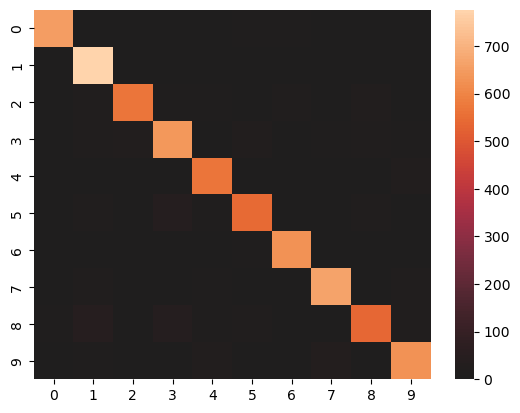

In [22]:
# drawing confusion matrix
figs = sns.heatmap(cm, center = True)

In [23]:
ClassificationReport = classification_report(y_test,y_pred)
print( ClassificationReport )

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       683
         1.0       0.84      0.97      0.90       800
         2.0       0.90      0.84      0.87       674
         3.0       0.86      0.84      0.85       760
         4.0       0.87      0.92      0.90       611
         5.0       0.88      0.82      0.85       658
         6.0       0.91      0.93      0.92       677
         7.0       0.91      0.91      0.91       724
         8.0       0.87      0.77      0.82       693
         9.0       0.89      0.88      0.88       720

    accuracy                           0.88      7000
   macro avg       0.89      0.88      0.88      7000
weighted avg       0.89      0.88      0.88      7000



## 2.KNN

In [24]:
knn = KNeighborsClassifier()

In [25]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
param_grid = {
    'n_neighbors': [3],
    'weights': ['distance'],
    'algorithm': ['auto']
}

In [28]:
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_micro', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'n_neighbors': [3],
                         'weights': ['distance']},
             scoring='f1_micro')

In [29]:
# Get the best model from grid search
best_knn = grid_search.best_estimator_


In [30]:
# Evaluate the best model on test data
y_pred = best_knn.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

## Classification Report & Confusion Matrix For KNN

In [31]:
# Print confusion matrix and F1 score
print('Confusion Matrix:')
print(cm)
print('\nF1 Score:', f1)

Confusion Matrix:
[[673   0   2   1   0   2   4   0   1   0]
 [  1 790   4   0   2   0   1   1   0   1]
 [  1   6 641   7   3   2   4   6   3   1]
 [  1   1  10 722   1   7   0   8   4   6]
 [  0   1   6   1 575   0   2   4   1  21]
 [  3   1   1  12   1 622   8   1   7   2]
 [  7   2   2   0   3   4 659   0   0   0]
 [  0   9   6   0   4   1   0 683   0  21]
 [  4   8   3   9   2  13   4   3 639   8]
 [  1   3   1   7   8   2   0  20   2 676]]

F1 Score: 0.9542857142857143


In [32]:
knn.score(X_train,y_train)

0.9864761904761905

In [33]:
knn.score(X_test,y_test)

0.9717142857142858

In [34]:
ClassificationReport = classification_report(y_test,y_pred)
print( ClassificationReport )

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       683
         1.0       0.96      0.99      0.97       800
         2.0       0.95      0.95      0.95       674
         3.0       0.95      0.95      0.95       760
         4.0       0.96      0.94      0.95       611
         5.0       0.95      0.95      0.95       658
         6.0       0.97      0.97      0.97       677
         7.0       0.94      0.94      0.94       724
         8.0       0.97      0.92      0.95       693
         9.0       0.92      0.94      0.93       720

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000



## 3.SVM

In [35]:
from sklearn.svm import SVC

In [36]:
# Define SVM model
svc = SVC()

In [37]:
# Define hyperparameters for grid search
param_grid = {
    'C': [1],
    'kernel': ['rbf']
}

In [38]:
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='f1_micro')
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, estimator=SVC(), param_grid={'C': [1], 'kernel': ['rbf']},
             scoring='f1_micro')

In [39]:
# Get the best model from grid search
best_svm = grid_search.best_estimator_

In [40]:
# Evaluate the best model on test data
y_pred = best_svm.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

### Classification Report & Confusion matrix For SVM

In [41]:
# Print confusion matrix and F1 score
print('Confusion Matrix:')
print(cm)
print('\nF1 Score:', f1)

Confusion Matrix:
[[674   0   1   0   0   1   4   1   1   1]
 [  0 790   4   1   0   0   0   3   1   1]
 [  1   3 651   3   3   0   4   6   3   0]
 [  1   4   8 722   2   7   0  11   2   3]
 [  0   0   6   0 586   1   2   5   3   8]
 [  1   1   1  12   0 629   6   5   3   0]
 [  2   0   1   0   4   2 662   5   1   0]
 [  0   4   6   0   5   0   0 702   0   7]
 [  1   4   2   8   4   6   2   4 661   1]
 [  2   5   1   7   6   1   0  13   3 682]]

F1 Score: 0.9655714285714285


In [42]:
ClassificationReport = classification_report(y_test,y_pred)
print( ClassificationReport )

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       683
         1.0       0.97      0.99      0.98       800
         2.0       0.96      0.97      0.96       674
         3.0       0.96      0.95      0.95       760
         4.0       0.96      0.96      0.96       611
         5.0       0.97      0.96      0.96       658
         6.0       0.97      0.98      0.98       677
         7.0       0.93      0.97      0.95       724
         8.0       0.97      0.95      0.96       693
         9.0       0.97      0.95      0.96       720

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



### Comparing all the three classifiers

In [43]:
# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

In [44]:
# Fit models
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# Calculate accuracies
lr_acc = lr.score(X_test, y_test)
svc_acc = svc.score(X_test, y_test)
knn_acc = knn.score(X_test, y_test)

In [46]:
# Compare accuracies
if lr_acc > svc_acc and lr_acc > knn_acc:
    print('Logistic Regression is the best model with accuracy:', lr_acc)
elif svc_acc > lr_acc and svc_acc > knn_acc:
    print('SVM is the best model with accuracy:', svc_acc)
else:
    print('KNeighborsClassifier is the best model with accuracy:', knn_acc)

SVM is the best model with accuracy: 0.975


# Conclusion


### The Support Vector Machine (SVM) emerged as the top-performing model for handwritten digit recognition, achieving an impressive F1 score of 0.975. While KNN closely followed with an F1 score of 0.954, Logistic Regression lagged behind with a score of 0.883. 

